# TPM034A Machine Learning for socio-technical systems 
## `Mini-project #2: Predicting Innovative Outcomes of Applied Research Projects in the NL`

**Delft University of Technology**<br>
**Q2 2023**<br>
**Module manager:** Dr. Sander van Cranenburgh <br>
**Instructors:** Dr. Sander van Cranenburgh, Dr. Giacomo Marangoni, Dr. Amir Pooyan Afghari <br>
**TAs:**  Francisco Garrido Valenzuela & Lucas Spierenburg <br>

## `Learning objectives:`
This mini-project addresses LO3, LO4, LO5 and LO6 in the course.

After the course, students can:
1. explain fundamental concepts of machine learning (ML).
2. conceptually explain the workings of a selected number of ML models and eXplainable AI (XAI) techniques, and apply these to empirical data.
3. **identify applications of ML and XAI techniques in real-world socio-technical systems**
4. **examine the impact of ML-based solutions and interventions on individuals, organisations, and society through XAI.**
5. **conduct an in-depth analysis of a real-world socio-technical challenge, by applying ML and XAI to empirical data.**
6. **reflect on the strengths and limitations of ML and XAI in real-world socio-technical systems.**

## `Project description` <br>

### **Introduction**
The Dutch government has an array of funding schemes available to foster knowledge production in the Netherlands. One of these schemes focuses on addressing the Dutch “knowledge paradox”: Despite the country’s strong science foundation, companies perform relatively weakly in research & development. The scheme addresses this issue by explicitly requiring funding applicants to set up a committee consisting of members from industry to discuss the potential applicability of (intermediate) findings and steer the research process. The underlying idea is that involving (potential) users like this will increase the likelihood of a project that generates innovative outcomes. However, considerable debate exists on how to organize such committees most effectively. Should members, for example, have a diverse technological background or not? Should the selection favour those project leaders who are more experienced? And what about the organization of the networks in which these projects become embedded because of inter-project links? 
The objective of this mini-project is to investigate whether a research project's innovative outcome can be predicted using data on the project network characteristics.

### **Data**
You have access to the following data:
1.	Project network characteristics for research projects in the Netherlands,
2.	The final innovative outcomes of projects based on the extent to which the project generated a product.
The file 'data description.pdf' provides a brief explanation of the data.

### **Tasks and grading**
There are 8 tasks in this project. In total, 10 points can be earned for these 8 tasks. The weight per task is shown below.

1.	**Data preparation**: prepare the data and separate training and testing data, handle the missing data, handle outliers [1 point]
2.	**Data discovery and visualisation**: investigate the distribution of variables, the correlation between variables, etc. [1 point]
3.	**Selection and application of a proper analytical technique**: create a regression or a machine learning model to predict the innovative outcome of the projects [1 point]
4.	**Model evaluation and output visualization**: evaluate the prediction ability of the selected model(s) [1 point]
5.	**Model explanation**: Identify top 5 features that have the most contribution to innovative outcome of the projects [1 point]
6.	Name two analytical strengths and two analytical limitations of your selected model and data to predict aggression levels [2 points]
7.	Discuss the societal impact of these analytical strengths and limitations on individuals, organisations, and society [2 points] 
8.	Propose a potential analytical solution (related to model or data) for mitigating the most severe limitation [1 point]



### **Grading criteria:**
For the first five tasks:
- Correctness of methods and techniques (45%)
- Completeness (45%)
- Coding skills (10%) 

For task 6, 7, 8:
- Depth of critical thinking and creativity (60%)
- Completeness (40%)


### **Submission**
When you finish the project, please submit the Jupyter Notebook file of your work to Brightspace and prepare a final presentation (including the results of the tasks) to be delivered on the presentations day.
This project is a group project and so each group must submit one Jupyter Notebook file. However, it is expected that all members of the group contribute to the project and so they all must participate in the final presentation.

The deadline for submission is **11/01/2024**.

# Group 5
Stefani Slavova, Esteban Ralon, Javier Mondragon, Anne de Koeijer, Suze van Santen, Canan Tezgec


### Install Requirements

In [1]:
#!pip install -r requirements.txt

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shap

# ML model training
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, log_loss, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## 1. Data Preparation

### Data loading

In [2]:
df = pd.read_csv("data/data.csv")
df.head()

,Project_id,project_outcomes,technoogical_field,year,network_density,network_degree_centralization,network_diameter,network_clustering,network_reach,research_location,technological_diversity,geographical_diversity,project_leader_experience,member_relational_experience,funds,project_joint_members
0,1,1,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Wageningen Universiteit,0.357143,0.266667,1,0,225.97,0.18
1,2,0,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Vrije Universiteit Amsterdam,0.428571,0.200000,0,0,545.00,0.16
2,3,1,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Wageningen Universiteit,1.000000,1.000000,0,0,262.36,0.08
3,4,1,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Wageningen Universiteit,0.214286,0.266667,0,0,477.71,0.18
4,5,1,Life_Sciences,1989,0.2,0.29,6,0.62,26.66732,Vrije Universiteit Amsterdam,1.000000,0.000000,0,0,496.10,0.30


### Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Project_id                     555 non-null    int64  
 1   project_outcomes               555 non-null    int64  
 2   technoogical_field             555 non-null    object 
 3   year                           555 non-null    int64  
 4   network_density                555 non-null    float64
 5   network_degree_centralization  555 non-null    float64
 6   network_diameter               555 non-null    int64  
 7   network_clustering             555 non-null    float64
 8   network_reach                  555 non-null    float64
 9   research_location              555 non-null    object 
 10  technological_diversity        555 non-null    float64
 11  geographical_diversity         555 non-null    float64
 12  project_leader_experience      555 non-null    int

In [4]:
df.describe()

,Project_id,project_outcomes,year,network_density,network_degree_centralization,network_diameter,network_clustering,network_reach,technological_diversity,geographical_diversity,project_leader_experience,member_relational_experience,funds,project_joint_members
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,278.000000,0.594595,1997.127928,0.167532,0.278108,6.093694,0.639874,45.281643,0.413828,0.263566,0.895495,0.846847,528.726685,0.164847
std,160.358972,0.491413,4.338127,0.070827,0.102144,1.069032,0.076784,9.240139,0.326600,0.294977,1.483932,1.864538,326.629299,0.136362
min,1.000000,0.000000,1989.000000,0.090000,0.150000,4.000000,0.530000,26.667320,0.000000,0.000000,0.000000,0.000000,1.140000,0.010000
25%,139.500000,0.000000,1994.000000,0.100000,0.180000,6.000000,0.580000,37.241146,0.166667,0.066667,0.000000,0.000000,300.480000,0.060000
50%,278.000000,1.000000,1997.000000,0.170000,0.270000,6.000000,0.620000,45.798451,0.333333,0.166667,0.000000,0.000000,478.530000,0.130000
75%,416.500000,1.000000,2001.000000,0.200000,0.350000,7.000000,0.700000,51.668060,0.600000,0.333333,1.000000,1.000000,675.195000,0.240000
max,555.000000,1.000000,2004.000000,0.320000,0.470000,8.000000,0.780000,62.157920,1.000000,1.000000,11.000000,15.000000,3432.030000,1.000000


It is clear that the data is quite clean already. From the 555 rows, there are only non-null values for all of them. 
The categorical columns (technological_field and research_location) contain strings with no particular errors.
In terms of outliers, by looking at the min and max values of each column we can confirm that rows are grouped close to the mean of the column.

### Convert categorical variables to numerical ones

In [5]:
categorical_cols = ["technoogical_field", "research_location"]
df_numerical = pd.get_dummies(df, columns=categorical_cols).astype(float)

# Rename columns

new_col_names = []
for col in df_numerical.columns:
    if any(sub in col for sub in categorical_cols):
        new_col_names.append(col.split("_")[-1].replace(" ", "_"))
    else:
        new_col_names.append(col)
df_numerical.columns = new_col_names
df_numerical.head()

,Project_id,project_outcomes,year,network_density,network_degree_centralization,network_diameter,network_clustering,network_reach,technological_diversity,geographical_diversity,...,Rijksuniversiteit_Groningen,Technische_Universiteit_Delft,Technische_Universiteit_Eindhoven,Universiteit_Leiden,Universiteit_Twente,Universiteit_Utrecht,Universiteit_van_Amsterdam,Universiteit_van_Maastricht,Vrije_Universiteit_Amsterdam,Wageningen_Universiteit
0,1.0,1.0,1989.0,0.2,0.29,6.0,0.62,26.66732,0.357143,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,0.0,1989.0,0.2,0.29,6.0,0.62,26.66732,0.428571,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,1.0,1989.0,0.2,0.29,6.0,0.62,26.66732,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1989.0,0.2,0.29,6.0,0.62,26.66732,0.214286,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,1.0,1989.0,0.2,0.29,6.0,0.62,26.66732,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Drop non-relevant columns for model

In [6]:
model_df = df_numerical.drop(["Project_id"], axis=1)

Since the Project_id is only a numerical identifier for each row, it is important to avoid including it for the model, as it will introduce non-relevant information to the training data.

## 2. Data Discovery and Visualisation

### Numerical column values summary

In [7]:
model_df.describe()

,project_outcomes,year,network_density,network_degree_centralization,network_diameter,network_clustering,network_reach,technological_diversity,geographical_diversity,project_leader_experience,...,Rijksuniversiteit_Groningen,Technische_Universiteit_Delft,Technische_Universiteit_Eindhoven,Universiteit_Leiden,Universiteit_Twente,Universiteit_Utrecht,Universiteit_van_Amsterdam,Universiteit_van_Maastricht,Vrije_Universiteit_Amsterdam,Wageningen_Universiteit
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,...,555.000000,555.000000,555.000000,555.000000,555.00000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,0.594595,1997.127928,0.167532,0.278108,6.093694,0.639874,45.281643,0.413828,0.263566,0.895495,...,0.072072,0.108108,0.077477,0.082883,0.10991,0.153153,0.036036,0.007207,0.059459,0.198198
std,0.491413,4.338127,0.070827,0.102144,1.069032,0.076784,9.240139,0.326600,0.294977,1.483932,...,0.258841,0.310797,0.267589,0.275954,0.31306,0.360460,0.186548,0.084665,0.236696,0.399002
min,0.000000,1989.000000,0.090000,0.150000,4.000000,0.530000,26.667320,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1994.000000,0.100000,0.180000,6.000000,0.580000,37.241146,0.166667,0.066667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1997.000000,0.170000,0.270000,6.000000,0.620000,45.798451,0.333333,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2001.000000,0.200000,0.350000,7.000000,0.700000,51.668060,0.600000,0.333333,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2004.000000,0.320000,0.470000,8.000000,0.780000,62.157920,1.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Numerical columns distributions

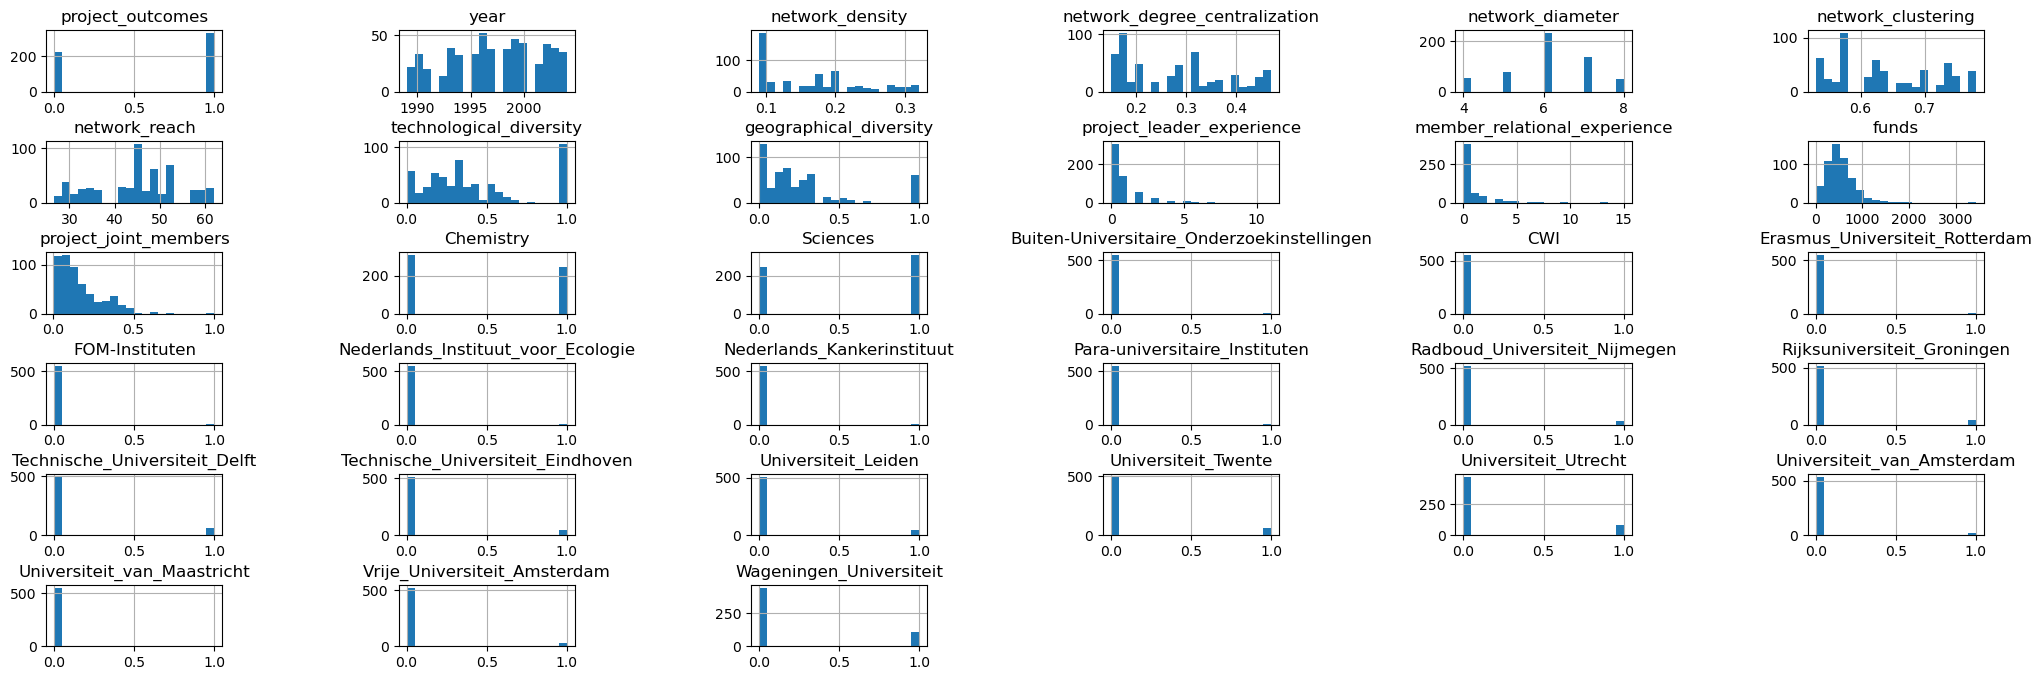

In [8]:
model_df.hist(bins=20, figsize=(25, 8))
plt.subplots_adjust(hspace=0.8, wspace=1)
plt.show()

From the distributions of the numerical columns, it can be observed most of the values for the project_joint_members are close to 0, which makes sense given that projects tend to have few members. Regarding the year, there are some gap years where no data was available. This has to do with the way the sampling of the data was done. Another interesint distribution is funds, which follows an almost normal distribution centered around the mean with some high values extended to the right tail. From a network analysis perspective, the fact that most distribution have a peak at one of the extremes is a proof of how some nodes have more weight than the rest, in terms of edges. However, there are clear clusters formed for specific groups of people, which might suggest some gaps in the network.

### Plot correlations

<Axes: >

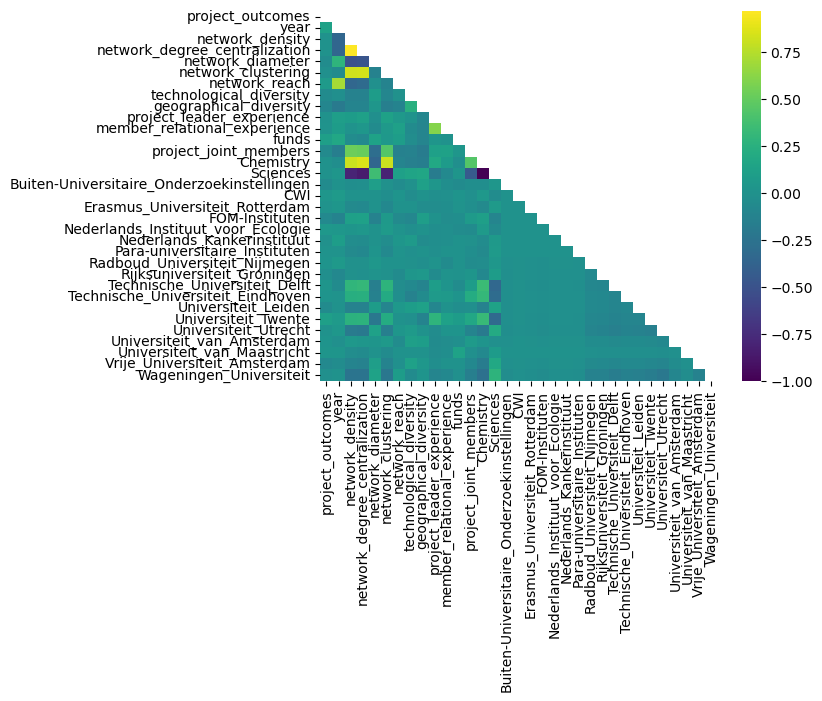

In [9]:
corr = model_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="viridis")

The variables that seem to be the most correlated are the ones related to network metrics. For instance, network_degree_centralization and network_density have a positive correlation close to 1. In smaller networks, it is more likely for nodes to be interconnected, which implies that there is a higher density where there is more centralization. The same implies for the rest of the network metrics. 

It is unsurprising that Chemistry and Sciences have the the opposite correlations with respect to the network metrics, as they are complementary values of the same category.

Lastly, there seems to be a tendency of each institution to focus more on either Chemistry or Sciences, based on the correlations that each has with the corresponding field. Nevertheless, it does not seem to be very correlated since the absolute values are close to 0.

## 3. Selection and application of a proper analytical technique

As all variables correlate similar with the variable 'project_outcomes', all variables are taken into account when computing the model. This, however, can potentially have implications regarding overfitting as this can produce highly complex models.

First, a logistic regression model is computed as 'benchmark' model. Logistic regression is used as the dependent variable is binary. This models aims to establish a baseline and serve as a point of reference for evaluating the performance of more complex machine learning algorithms. In other words, it provides a comparison that indicates the minimum level of performance that more complex models should achieve to be considered useful. Afterwards, a Random Forest model is created. In doing so, we are able to evaluate and compare one highly interpretable and presumably low accurate model -the logistic regression model- and one low interpretable and presumably highly accurate model -an Ensemble model: Random Forest model. The choice had fallen on a Random forest model as Ensemble model as it can be used for regression and classification tasks (the case here is classification) with good performance on a variety of problems and as it is suitable for handling high dimensional datasets with a large number of features.

As we work with classification models, we will evaluate the models performance by computing the Accuracy, Recall, Precision and F1 score. Moreover, the cross-entropy is computed for both models.


In [10]:
#Creating train and test data
#Dummies variables are already there for the categorical variables
columns_to_scale = ['year', 'network_density', 'network_degree_centralization', 'network_diameter', 'network_clustering', 'network_reach', 'technological_diversity', 'geographical_diversity', 'project_leader_experience', 'member_relational_experience', 'funds', 'project_joint_members']

#Target variable
y = model_df["project_outcomes"]

#Feature
X = model_df.drop("project_outcomes", axis=1)
#Dropping columns to be scaled
X_binary = X.drop(columns=columns_to_scale)

#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[columns_to_scale])
X_scaled = pd.DataFrame(X_scaled)
#Adding scaled features
X = pd.concat([X_binary, X_scaled], axis=1)

#Renaming scaled columns
X.columns = list(X.columns[:-len(columns_to_scale)]) + columns_to_scale

#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [11]:
def calculate_ce(model,X,Y):
    # Compute cross entropy
    # Use the model object to predict probabilities per class
    prob = model.predict_proba(X)

    # Multiply the probabilities with Y (0/1 array), and sum along the row axis to obtain the predicted probability of the target
    Y_dummy = pd.get_dummies(Y).to_numpy()
    prob_chosen = np.sum(prob*Y_dummy,axis=1)

    # Take the logarithm
    log_prob_chosen = np.log(prob_chosen)

    # Compute the cross entropy
    cross_entropy = -np.sum(log_prob_chosen)/len(Y)
    return cross_entropy

## 3.1 Logistic Regression

In [12]:
# Training a benchmark model: Logistic regression
log_reg = LogisticRegression(random_state=42, max_iter = 1000)
log_reg.fit(X_train, y_train)
y_log_pred_train = log_reg.predict(X_train)
y_log_pred_test = log_reg.predict(X_test)

# Print the results
print('\t\t Train set\t Test set')
print(f'Accuracy\t {accuracy_score(y_train, y_log_pred_train):0.3f}\t\t {accuracy_score(y_test, y_log_pred_test):0.3f}')
print(f'Precision\t {precision_score(y_train, y_log_pred_train):0.3f}\t\t {precision_score(y_test, y_log_pred_test):0.3f}')
print(f'Recall\t\t {recall_score(y_train, y_log_pred_train):0.3f}\t\t {recall_score(y_test, y_log_pred_test):0.3f}')
print(f'F1 score\t {f1_score(y_train, y_log_pred_train):0.3f}\t\t {f1_score(y_test, y_log_pred_test):0.3f}')

		 Train set	 Test set
Accuracy	 0.616		 0.590
Precision	 0.645		 0.598
Recall		 0.828		 0.849
F1 score	 0.725		 0.702


In [13]:
print(f'Cross entropy for train data: {calculate_ce(log_reg, X_train, y_train):.3f}')
print(f'Cross entropy for test data: {calculate_ce(log_reg, X_test, y_test):.3f}')

Cross entropy for train data: 0.620
Cross entropy for test data: 0.669


In [14]:
# Retrieve the model's coefficients
coefficients = log_reg.coef_[0]

# Match the coefficients to the feature names
feature_names = X_train.columns
feature_importance = pd.Series(coefficients, index=feature_names)

# Sort the values in descending order
sorted_coefs = feature_importance.sort_values(ascending=False)

# Display the coefficients
print(sorted_coefs)

network_degree_centralization                 0.611723
Universiteit_Twente                           0.530974
Sciences                                      0.496284
year                                          0.472137
Technische_Universiteit_Eindhoven             0.399582
CWI                                           0.257277
Nederlands_Instituut_voor_Ecologie            0.256938
Radboud_Universiteit_Nijmegen                 0.227637
Universiteit_van_Amsterdam                    0.219331
Technische_Universiteit_Delft                 0.206976
Universiteit_Utrecht                          0.144004
funds                                         0.138533
Erasmus_Universiteit_Rotterdam                0.131479
project_leader_experience                     0.100263
network_clustering                            0.083411
Para-universitaire_Instituten                 0.082564
Rijksuniversiteit_Groningen                   0.018060
member_relational_experience                  0.014944
Universite

##### Benchmark model evaluation
The benchmark logistic regression model is performing moderately well, with no significant overfitting to the training data as the test metrics are close to the train metrics. However, there is room for improvement, especially in terms of precision and accuracy, which are below 65%. The recall is quite high, suggesting the model is better at identifying positive instances at the cost of incorrectly labeling negative instances as positive. The F1 score indicates a moderate balance between precision and recall.

##### Coefficients
The coefficients from the logistic regression model provide insights into the relationship between each feature and the likelihood of the target variable, in this case, the success or failure of an innovation project. The features were scaled before fitting the logistic regression model, thus, the coefficients can be compared directly to assess the relative importance of each feature. It should be noted that while the coefficients provide valuable information about the tendencies in the data, they do not imply causation. <br> 

The larger the coefficient, the stronger the influence of the feature. network_degree_centralization has the largest positive coefficient, indicating a strong positive impact on project success. Features with negative coefficients are associated with a decreased likelihood of a project being successful. For example, Nederlands_Kankerinstituut has a negative coefficient, suggesting that projects associated with this institute are less likely to be successful. Coefficients close to zero suggest that the feature has a minimal influence on the outcome. For example, Universiteit_van_Maastricht has a coefficient close to zero, indicating it does not significantly affect the likelihood of project success or failure.

## 3.2 Random Forest

For the Random Forest model, we perform hyperparameter tuning by utilizing a grid search method. The chosen parameter grid includes the: 
1) Number of trees in the forest (n_estimators)
2) Maximum number of levels in each tree (max_depth)
3) Minimum number of samples required to split a node (min_samples_split)
4) Minimum number of samples required at each leaf node (min_samples_leaf) <br>

The function was run several times with different parameter values, aiming at identify patterns among the best-performing hyperparameter combinations. If the best hyperparameters were at the boundaries of the grid, the grid was expanded beyond these values, while being cautious about severe overfitting of the model.  Once a promising range of values was identified, a last  grid search with a narrower focus around these values was performed to fine-tune the hyperparameters.

In [30]:
# Define a function for model training, grid search and evaluation

def perform_grid_search_classification(X_train, y_train, X_test, y_test, model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
   
    model_name = best_model.__class__.__name__
    
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print('\t\t Train set\t Test set')
    print(f'Accuracy\t {accuracy_train:0.3f}\t\t {accuracy_test:0.3f}')
    print(f'Precision\t {precision_train:0.3f}\t\t {precision_test:0.3f}')
    print(f'Recall\t\t {recall_train:0.3f}\t\t {recall_test:0.3f}')
    print(f'F1 score\t {f1_train:0.3f}\t\t {f1_test:0.3f}')
    
    return best_model, grid_search.cv_results_

In [31]:
# Define a function to generate a visualization from the parameter grid search
def plot_grid_search_results(cv_results):
    results_df = pd.DataFrame(cv_results)
    results_df = results_df.sort_values(by='rank_test_score')

    # Create a new column that contains a string representation of the hyperparameters
    hyperparams_str = results_df['params'].apply(lambda x: '_'.join([f"{k}={v}" for k, v in x.items()]))
    results_df['hyperparams_str'] = hyperparams_str

    # Plot
    plt.figure(figsize=(20, 8))
    plt.bar(results_df['hyperparams_str'], results_df['mean_test_score'], color='skyblue')
    plt.xlabel('Hyperparameter combinations')
    plt.ylabel('Mean Test Score (Accuracy)')
    plt.xticks(rotation=90)
    plt.title('Grid Search Scores for Random Forest')
    plt.tight_layout()
    plt.show()

In [32]:
# Parameter grid for RandomForestClassifier
random_forest_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum number of levels in each tree
    'min_samples_split': [5, 10, 15],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 4, 7],  # Minimum number of samples required at each leaf node
}

In [33]:
# Initialize model(s)
rf = RandomForestClassifier(random_state=42)

# Perform grid search for each model
best_rf_model, rf_cv_results = perform_grid_search_classification(X_train, y_train, X_test, y_test, rf, random_forest_grid)

Model: RandomForestClassifier
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 200}
		 Train set	 Test set
Accuracy	 0.886		 0.590
Precision	 0.899		 0.582
Recall		 0.886		 0.590
F1 score	 0.882		 0.541


In [19]:
print(f'Cross entropy for train data: {calculate_ce(best_rf_model, X_train, y_train):.3f}')
print(f'Cross entropy for test data: {calculate_ce(best_rf_model, X_test, y_test):.3f}')

Cross entropy for train data: 0.452
Cross entropy for test data: 0.669


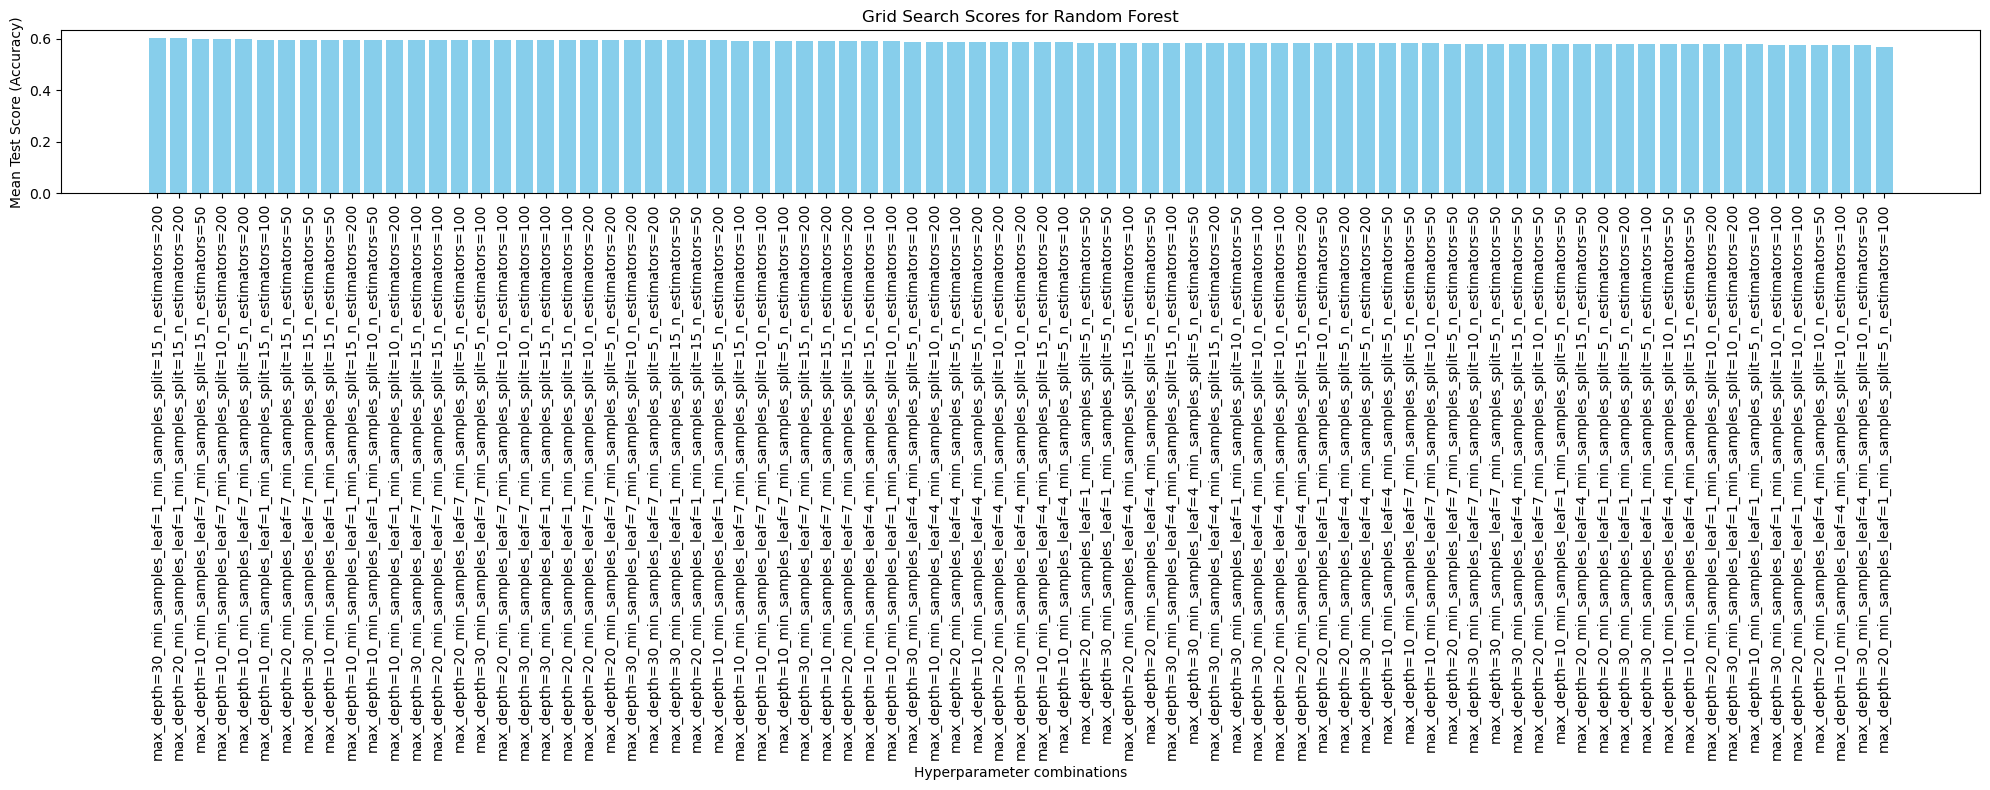

In [20]:
# Call the function to plot the results of the grid search
plot_grid_search_results(rf_cv_results)

The Random Forest Classifier exhibits high training performance with an accuracy, precision, recall, and F1 score all above 88%, indicating a strong fit to the training data. However, a performance drop in these metrics on the test set suggests overfitting. The accuracy and precision fall to around 59%, and the F1 score decreases to 54.1%, highlighting a discrepancy between training and test results and pointing to a model that does not generalize well. This indication of overfitting is also evident in the cross entropy scores. For the train data, a score of 0.452 indicates a moderate level of confidence in predictions across the train dataset. However, for the test data, a performance drop occurs as the score rises to 0.669. <br>

When comparing these results to the previous benchmark logistic regression model:
- The tuned RandomForestClassifier shows a much higher accuracy, precision, recall, and F1 score on the training data, which might be indicative of overfitting.
- The logistic regression benchmark model has closer performance metrics between the training and test sets, which may suggest it is generalizing better than the RandomForestClassifier.
- The cross-entropy for the test set is the same for both models (0.669), suggesting they are similarly confident in their test predictions, despite the RandomForestClassifier's overfitting.

In summary: Compared to the benchmark logistic regression model, the Random Forest shows better training results but does not maintain this performance on the test set, whereas the logistic regression model shows more consistency between train and test results, albeit with lower training scores. 

Nevertheless, the performance of both models is similar. As the Random Forest can capture non-linear relationships between features and the target variable, which logistic regression cannot do without feature engineering, we chose to continue with the Random Forest model.


In [21]:
# Fit the model with the best hyperparameters
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)

## 4. Model evaluation and output visualization
In this step, the prediction ability of the selected model, Random Forest, is evaluated in detail. Here, we look at:<br>
    i. Confusion Matrix <br>
    ii. Performance metrics <br>
    iii. Predicted vs actual outcome comparison graphs <br>


**i. Confusion Matrix**

Confusion matrices show counts from predicted and actual outcomes. The counts on the diagonal are correctly classified outcomes. The counts on the off-diagonal elements are the misclassified outcomes.

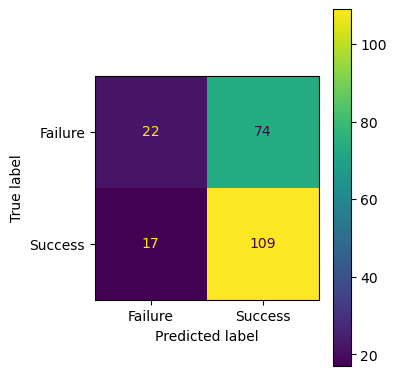

In [22]:
# Plot the test vs the predicted outcome (Y_test vs Y_pred)
# Show the confusion matrices for Random Forest with hyperparameters tuned (without normalization)
fig, ax = plt.subplots(1, 1, figsize=(4,4))
fig.set_tight_layout(True)

ylabels = ['Failure', 'Success']

# Confusion Matrix for Random Forest with hyperparameters tuned (without normalization)
cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_pred_test,display_labels = ylabels, normalize=None,  ax=ax)

plt.show()

* Among 222 data points, our model classified only 131 (the sum of the diagonals) of them correctly. So, the accuracy of the model is 0.59. 
* We see that our model is good at predicting "success": out of 126 data with the true label "success," it labels 109 of them correctly. However, it mostly fails to predict the "failure" data points. Out of 96 "failure" data points, it predicted only 22 of them as failures. So, the model tends to label most of the data points as "success."

**ii. Performance Metrics**

To assess the model performance in more depth, we thus must look at the predictions at the level of the classes.
That's why, at first, we check the classification report metrics:

* **Precision**: what fraction of predictions for a given class are actually of that class.
* **Recall**: what fraction of all observations belonging to a given class are correctly predicted as such by the model.
* **f1-score**: a measure of the harmonic mean of precision and recall. It integrates precision and recall into a single metric to gain a better understanding of model performance.


In [23]:
# Calculate precision and recall for each class
ylabels = ["Failure", "Success"]

precision = precision_score(y_test, y_pred_test, average=None)
recall = recall_score(y_test, y_pred_test, average=None)
report = classification_report(y_test, y_pred_test, target_names=ylabels)

# Print classification report
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     Failure       0.56      0.23      0.33        96
     Success       0.60      0.87      0.71       126

    accuracy                           0.59       222
   macro avg       0.58      0.55      0.52       222
weighted avg       0.58      0.59      0.54       222



* Overall, the model achieves moderate precision and recall values for both the "Failure" and "Success" classes. 
* For the "Failure" class, the precision of 0.56 means that slightly more than half of the predicted failures are accurate. However, the recall of 0.23 indicates that the model struggles to correctly identify actual failures. 
* For the "Success" class, the precision of 0.60 indicates that around 60% of the predicted successes are correct. The recall of 0.87 shows that the model performs relatively well in identifying actual successes. 
* The F1-scores, which consider both precision and recall, are 0.33 for "Failure" and 0.71 for "Success". These scores suggest that the model's performance in predicting "Success" is relatively better than predicting "Failure".

Then, we look at **Matthew's correlation coefficient** (MCC), another commonly used metric to evaluate the prediction performance while accounting for imbalances in the data set. It is generally regarded as one of the best measures to describe the confusion matrix of true and false positives and negatives by a single number, even if the classes are very different sizes. MCC ranges from -1 to 1, where a coefficient of 1 indicates a perfect prediction, 0 indicates random prediction, and -1 indicates the exact opposite prediction.


In [24]:
# Calculate Matthew's correlation coef
mcc_score = matthews_corrcoef(y_test, y_pred_test)
print(f"Matthew's correlation coefficient: {mcc_score:.3f}")

Matthew's correlation coefficient: 0.123


Based on the MCC value, the model's performance in predicting the classes can be considered weak. It indicates a limited correlation between the model's predictions and the actual classes. 

**iii. Predicted vs Actual Outcome**

Initially, we draw a scatter plot to show actual vs predicted outcomes:

* The scatter plot represents the relationship between the actual class labels and the predicted probability of belonging to "Success"". Each point on the plot represents an instance in the test set.
* In the scatter plot, the x-axis represents the actual class labels, while the y-axis represents the predicted probability of belonging to "Success". 
* Points closer to the plot's top right or bottom left corners indicate accurate predictions. On the other hand, points scattered in the middle of the plot indicate instances that are more challenging for the model to classify accurately. 

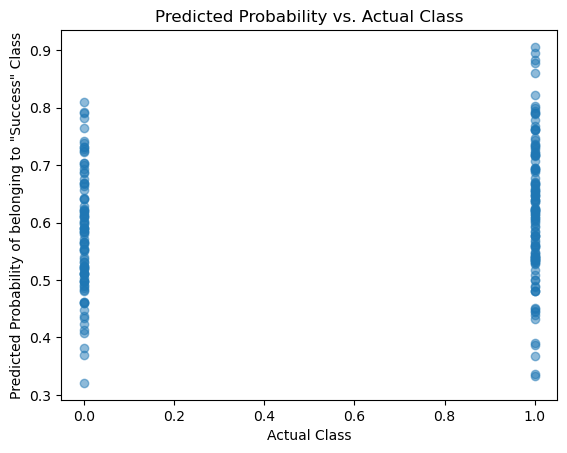

In [25]:
# Create a scatter plot of the predicted probability vs. the actual class
plt.scatter(y_test, y_pred_proba[:,1], alpha=0.5)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Probability of belonging to "Success" Class')
plt.title('Predicted Probability vs. Actual Class')
plt.show()

* We see a few points in the top right and bottom left corners, especially in the latter. In line with the comments above, the graph shows that the model is especially not good at accurately classifying failure.
* The presence of many points above the 0.5 probability threshold for "Failure (0)" in the middle of the scatter plot suggests that the model is uncertain in correctly predicting these instances. These points represent instances where the predicted probability of belonging to "Success (1)" is relatively high, even though the true class is actually failure. The features of these instances might be similar to those of Success instances.
* The concentration of points in the middle of the graph signifies instances that pose a challenge for the model. It indicates that the model is not confidently distinguishing between Success and Failure for these instances, resulting in less accurate predictions.

Next, we utilize a **ROC curve**, which is a graphical representation of the performance of a classification model. 
* The area under the ROC curve (AUC) value ranges from 0 to 1, where a higher value represents a better-performing model.
* The closer the orange line is to the top-left corner, the better the model's performance in terms of achieving high true positive rates while keeping the false positive rates low.

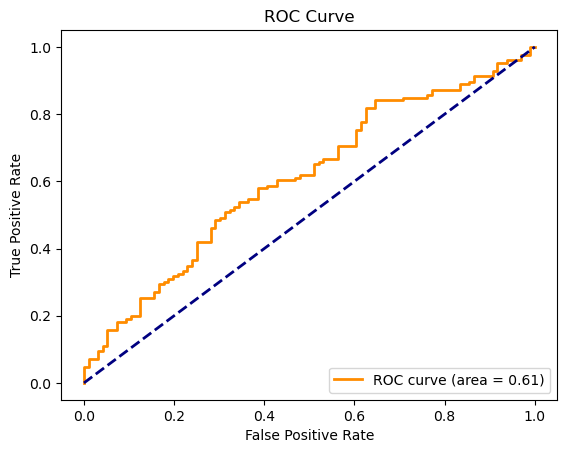

In [26]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

 The AUC value (0.61) suggests that the model's overall performance is fair. However, it indicates that there is room for improvement in terms of the model's ability to accurately classify instances.

## 5.	Model explanation
*Identify top 5 features that have the most contribution to innovative outcome of the projects*

Insights into the contribution of the selected features to the prediction of the innovative outcome of a project can be gained with the use of Explainable AI. In this case, insights are gained with the use of SHapley Additive exPlanations (SHAP).

Permutation explainer: 223it [01:46,  1.97it/s]                                                                        


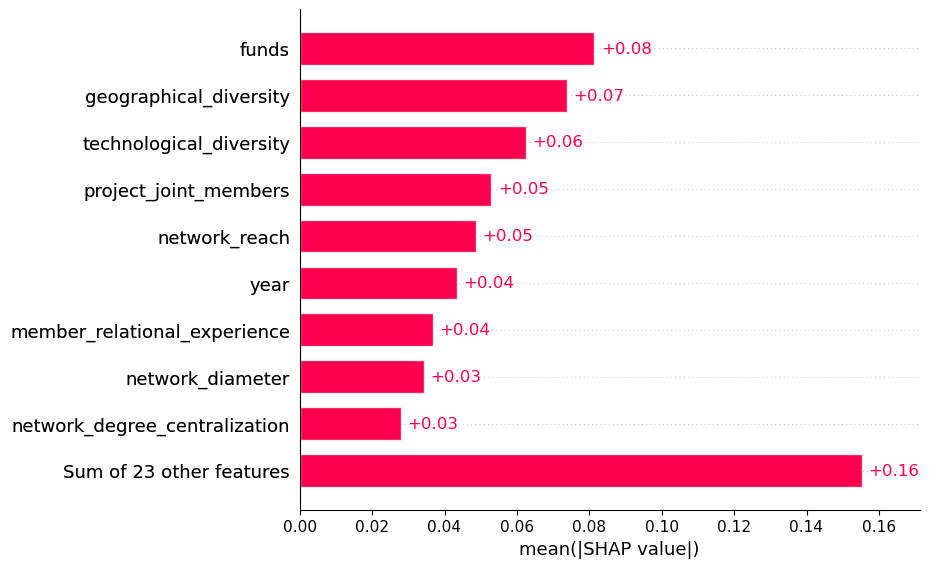

In [27]:
# Calculate the SHAP values for each feature
X100 = shap.sample(X_train, 100, random_state=0)
explainer_rf = shap.Explainer(best_rf_model.predict, X100)
shap_values_rf = explainer_rf(X_test)

# Plot a bar plot of the most predictive features
shap.plots.bar(shap_values_rf)

The Bar Plot of the shapely values gives insight into the mean contribution of the separate features to the model outcomes. It can be seen that the highest mean SHAP value is 0.08 for the Funds feature. The top 5 features with the highest contribution are:
1. Funds - The amount of funding granted to the project by the funding organization
2. Geographical Diversity - The variety of project team members in terms of their geographical location
3. Project Joint Member - Whether one or more project members are also active in one or more other projects
4. Technological Diversity - The variety in the range of technical knowledge, expertise and experience between project members
5. Network Reach - How easy it is to reach another project

All features visualised in the bar plot have a positive contribution to the overall outcome. This is however the mean of the SHAP value. A beeswarm plot is used to gain insight in the overall variation of the SHAP values.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


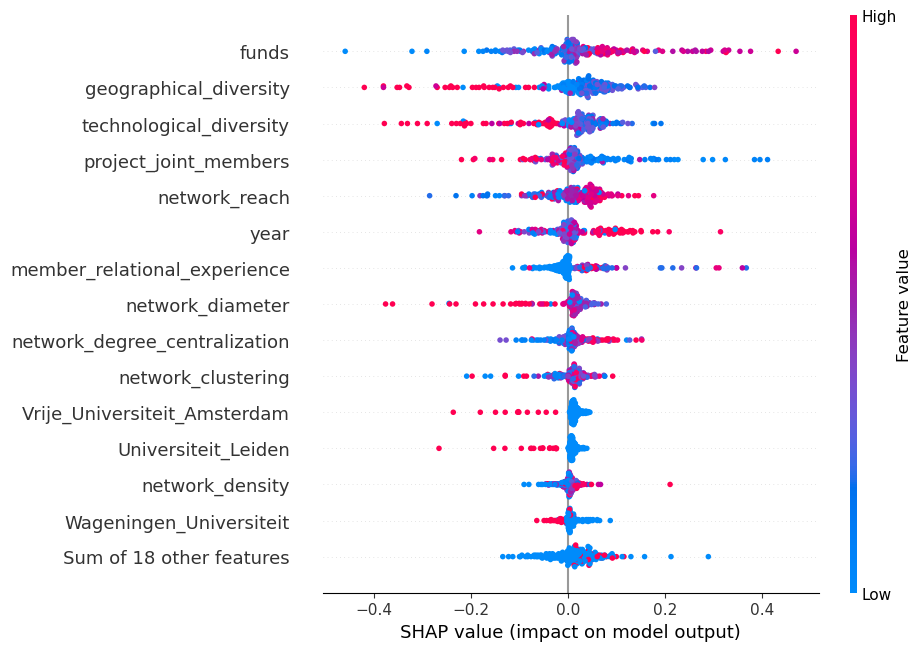

In [28]:
# Plot Beeswarm plot of 15 features with the highest contribution
shap.plots.beeswarm(shap_values_rf, max_display=15)

The beeswarm plot of the SHAP values indicate the impact that each attribute has on the prediction of the model output, the innovative outcome of the project. Each dot represents a sample. What can be seen is that the contribution of the features is horizontally widespread. This indicates that the impact/contribution of the features vary significantly over various instances. For example, the funds feature has a positive contribution to the innovative outcome of a project in some cases, whilst it has a negative contribution in others. The influence is thus not constant and highly variable.

The previously presented mean SHAP values indicated a relatively small positive contribution of the features. The beeswarm plot has highlighted the variance in SHAP values, with large differences in SHAP values occurring for different samples.

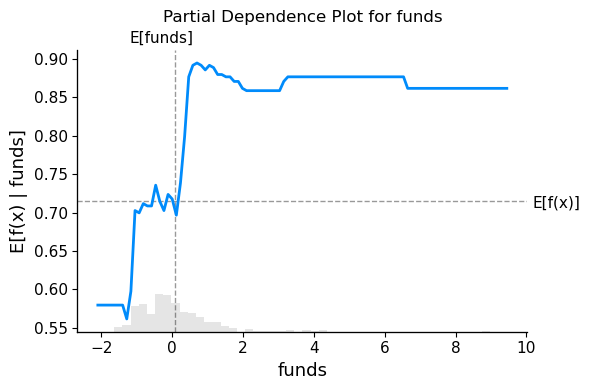

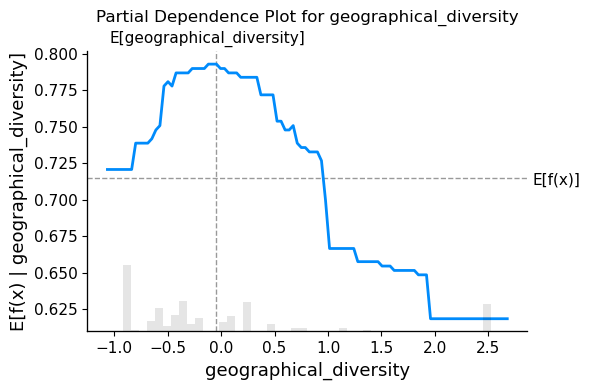

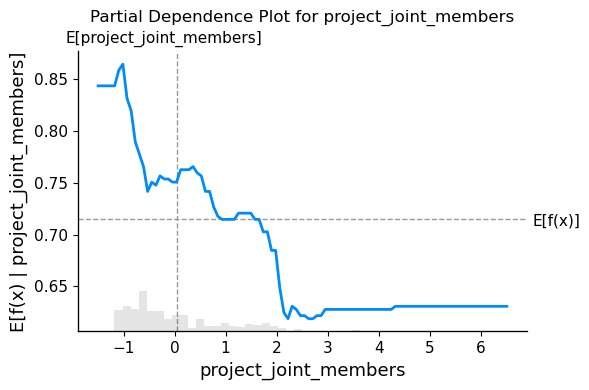

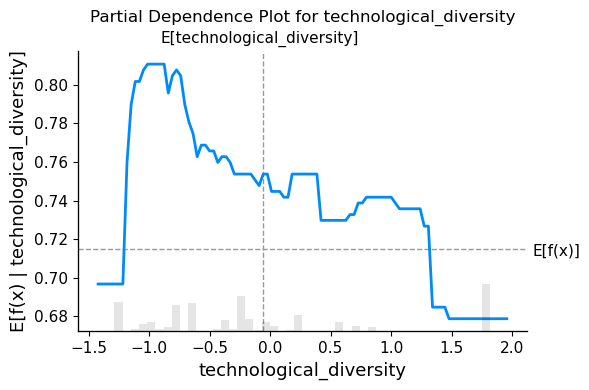

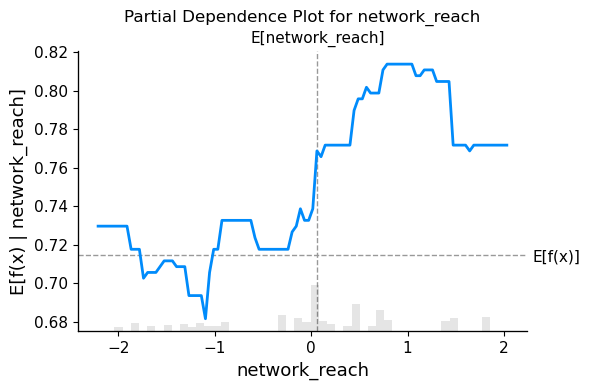

In [29]:
# Partial dependence plot
# List of features for which you want to create partial dependence plots
features_to_plot = ["funds", "geographical_diversity", "project_joint_members", "technological_diversity", "network_reach"]

# Create separate plots for each feature
for feature in features_to_plot:
    fig, ax = plt.subplots(figsize=(6, 4))  # Set the size of each plot

    shap.partial_dependence_plot(
        feature,
        best_rf_model.predict,
        X_train,
        model_expected_value=True,
        feature_expected_value=True,
        show=False,
        ice=False,
        ax=ax  # Assign the subplot to draw the plot
    )

    ax.set_title(f'Partial Dependence Plot for {feature}')
    plt.tight_layout()
    plt.show()

Finally, we use partial dependency plots to look at the influence of the five most important features. The features have been scaled, resulting in scaled X-axes of the partial dependency plots. The gray bars indicate the distribution of available values in the data. For all features, it is notable that the distribution is not fully balanced and sometimes contains gaps. This indicates some limitations in the available data. The plots can be used to illustrate the relationship between the feature and the predicted outcomes while marginalizing all other features, making it possible to understand the individual effects of a feature. These relationships are shortly described:

1. Funds
The partial dependence plot for Funds indicate an almost linear relationship, with increased funding having increased positive contribution to the innovative outcome of a project. More money increases the likelihood of a project succeeding, but it is no guarantee for a positive outcome.
2. Geographical Diversity
The partial dependence of the model to Geographical diversity indicates that an increase in geographical diversity decreases the positive contribution. A project with more diversity has a decreased likelihood of beeing successful. A real life possibility could be that geographically diverse teams face difficulties to meet, thus complicating the teamwork and maybe outcome of the project.
3. Project Joint Member
Increased joint membership follows a similar relationship to Geographical diversity, with an increase in the number of projects members are involved in leading to a less positive contribution to the model outcome.
4. Technological Diversity
The Technological diversity reveals a dependency that can be seen as fairly average. This indicates that the positive contribution of the technological diversity does not differ much with an increase or decrease of this diversity.
5. Network Reach
The relationship between the network reach and innovative outcomes is that the positive contribution increases with an increase in network reach. This could be related to members being able to reach out to other projects more easily for exchange of information or help.



## 6.	Analytical Strengths and Weaknesses

It must be mentioned that given the lackluster performance of the model, addressing the limitations of the model is easier than highlighting its strengths. The main strength of the model is that ‘decent’ performance in the identification of actual success (recall = 0.87). Even if the model is poor at predicting failures, if the main goal is to ensure that ‘opportunities’ for success are not discarded, the model still provides decent guidance. Even if failures slip through, successes are less likely to be missed. The use of SHAP for analyzing the contributions of different features to the model performance allows for an evaluation of ‘what really matters in the prediction’. As the beeswarm plot shows, there is a lot of variation across all features, even those with ‘high’ SHAP values. This indicates that the features are not very good predictors, as demonstrated by the model performance. However, one valuable insight obtained from the SHAP value analysis is the fact that traditional network metrics (e.g. network density, centrality) are NOT the most important. Therefore, it could be argued that network design may not be the best approach to evaluate these research initiatives. 

In terms of limitations, the first is simply the overall poor performance of the model. Even though recall is decent, most other metrics are poor. Furthermore, this is without considering the general limitations of this approach to evaluate/predict the success/failure of research initiatives. One of the issues is the type of data used for the analysis. The network metrics used are static and do not reflect the dynamic nature of these research collaborations. Simply because a node exists in the network, and it represents a ‘potential’ bridge between different stakeholders does not mean the connection ever comes to fruition.  Therefore, the data used for training the model does not really reflect the dynamic behavior of the network. Furthermore, there is always the concern of using past data to predict future endeavors. Each collaboration has its own set of nuances, incidents and is subject to its times and own (momentary) limitations. These factors cannot be easily captured by variables and, even if they could, they may not serve as proper predictors since circumstances are different for current/future collaborations.


## 7. Societal impact

The fact that the model has a decent recall score leads to the question of what is more valuable for society. Do we want to ensure that potentially successful collaborations take place? If that is the case the model seems to address the goal. However, if there is a concern of how public resources, funding in particular, are being distributed between different initiatives. Then the model is not suited for addressing this issue, since many failures would still be classified as collaborations in need of funding. The adoption of the model in its current state would lead to a waste of public resources. However, the waste depends on how success and failure are measured. Research projects are being classified based on their potential to lead to generating a product. Is that a fair measure to determine the value, the success of research? If the model were adopted to determine support for research projects, it would be biased for commercial research and negatively impact other forms of research. This would be detrimental for very specialized research institutions and more niche research groups. In some sense, the way in which the classification labels are defined could be considered as another limitation of the data. On the positive side, the use of XAI techniques such as SHAP values allow the decision-makers responsible for the allocation of resources to understand different features affect predictions. For example, the model could lead decision-makers to consider that adjusting network metrics is not the optimal way to improve the performance of these projects. Therefore, allocation of resources would need to follow other factors. In that sense, the interpretability of the model prevents wasteful effort in influencing elements that have little impact on the results of the model. 


## 8. Mitigation measures

The most severe limitation is the poor model performance that limits the quality of the XAI analysis and any potential implementation. One reason for the poor performance is the lack of features that may serve as strong predictors. Furthermore, as previously mentioned, the networked metrics included are very basic and static. The dynamic nature of research collaboration is not properly captured. Therefore, the best chance for the model to improve its performance would be to re-evaluate the sort of variables included. Various types of new features could replace the current ones, such as: avg. number of committee meetings, market value of companies involved, number of active researchers working on the project, etc. Whether these variables would improve the model performance would need to be test, but the idea is that the current variables are not sufficient and these need to either be replaced or complemented. 